In [84]:
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from plotly import graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot

In [85]:
df = pd.read_csv('/home/hello/Documents/coding/ML/cancer_EDA_KR/dataset1/data - Kyrgyzstan3.csv')

In [86]:
df['date'] = df['Наименование показателей']
del df['Наименование показателей']

In [4]:
df_men = df[['date', '[0]Губы, полости рта и глотки', '[0]Желудка',
       '[0]Прямой кишки', '[0]Трахеи, бронхов и легкого', '[0]Кожи',
       '[0]Лимфатической и кроветворной ткани', '[0]Прочих органов' ]].dropna().drop_duplicates()
def_women = df[['date', '[1]Губы, полости рта и глотки', '[1]Желудка', '[1]Прямой кишки',
       '[1]Трахеи, бронхов и легкого', '[1]Кожи',
       '[1]Лимфатической и кроветворной ткани', '[1]Прочих органов', ]].dropna().drop_duplicates()

In [5]:
len(df)

32

In [87]:
df['date'] = pd.to_datetime(df['date'], format='%Y')

Text(0.5, 1.0, 'Динамика развития онкологических заболеваний у мужчин')

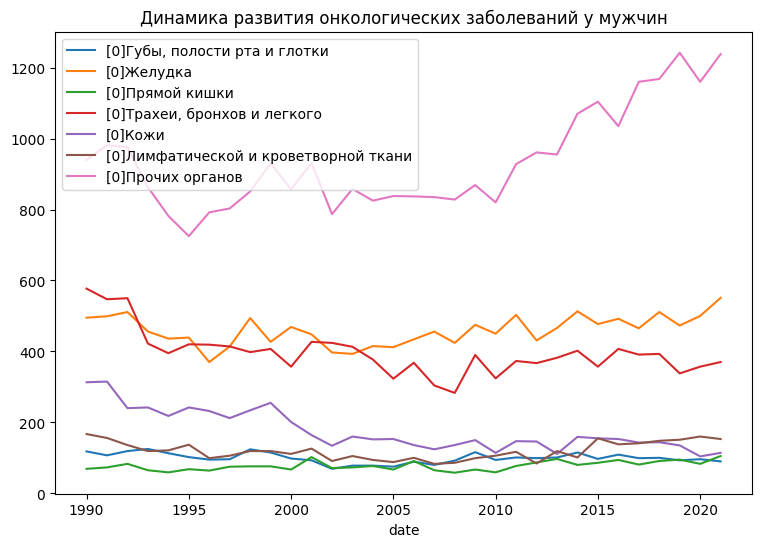

In [7]:
df_men.groupby('date').sum().plot(figsize=(9, 6))
plt.title("Динамика развития онкологических заболеваний у мужчин")

Text(0.5, 1.0, 'Динамика развития онкологических заболеваний у женщин')

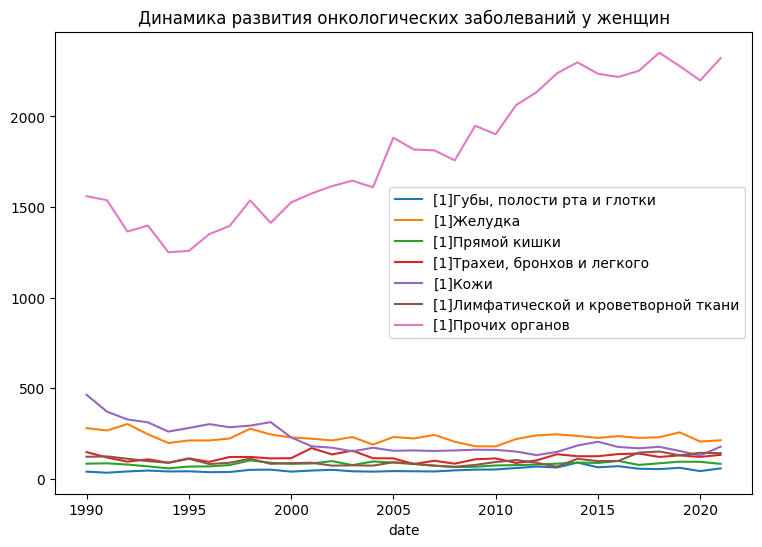

In [9]:
def_women.groupby('date').sum().plot(figsize=(9, 6))
plt.title("Динамика развития онкологических заболеваний у женщин")

<AxesSubplot: ylabel='Мужчины [2020г]'>

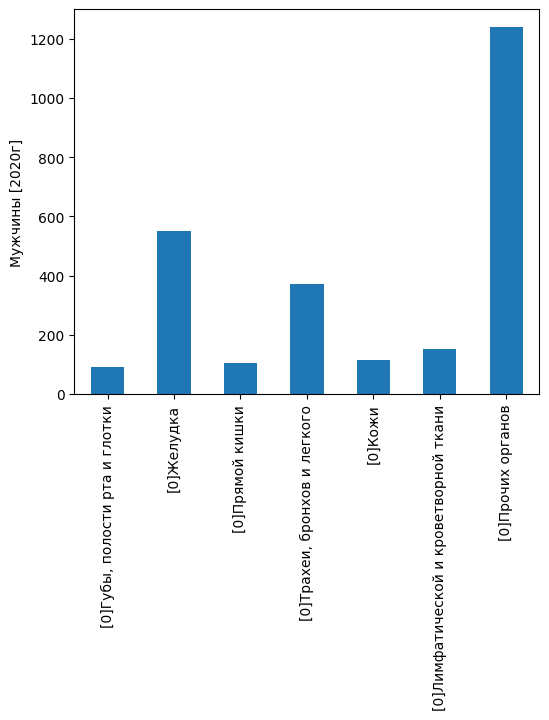

In [64]:
# df_men.loc[31, '[0]Губы, полости рта и глотки':'[0]Прочих органов'].plot(kind='pie', autopct='%1f', explode=(0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01), figsize=(4, 4))
df_men.loc[31, '[0]Губы, полости рта и глотки':'[0]Прочих органов'].plot(kind='bar', figsize=(6, 5), ylabel='Мужчины [2020г]')

<AxesSubplot: ylabel='Женщины [2020г]'>

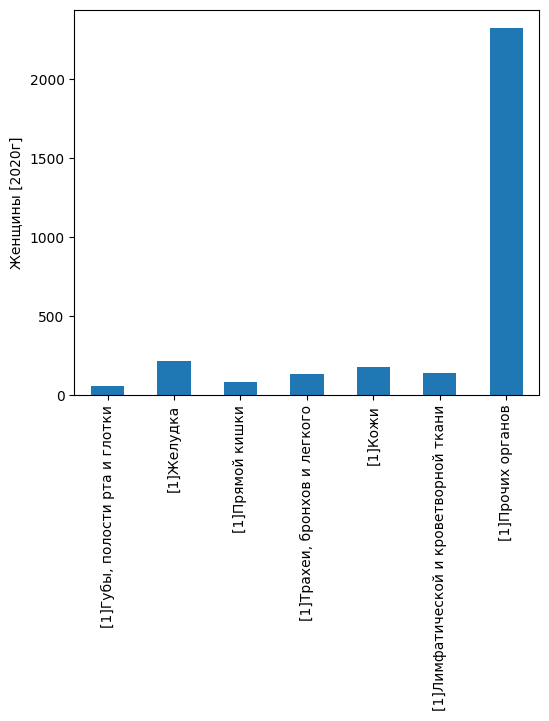

In [66]:
def_women.loc[31, '[1]Губы, полости рта и глотки':'[1]Прочих органов'].plot.bar(figsize=(6, 5), ylabel='Женщины [2020г]')

In [70]:
df[' мужчины'].tail()

27    2480
28    2555
29    2527
30    2460
31    2621
Name:  мужчины, dtype: int64

In [88]:
df = df[['date', 'total']].dropna().drop_duplicates()

In [6]:
df

,date,total
0,1990-01-01,5370
1,1991-01-01,5209
2,1992-01-01,4930
3,1993-01-01,4562
4,1994-01-01,4104
5,1995-01-01,4235
6,1996-01-01,4211
7,1997-01-01,4341
8,1998-01-01,4782
9,1999-01-01,4629


In [89]:
df.sort_values(by=['date']).head(n=10)

,date,total
0,1990-01-01,5370
1,1991-01-01,5209
2,1992-01-01,4930
3,1993-01-01,4562
4,1994-01-01,4104
5,1995-01-01,4235
6,1996-01-01,4211
7,1997-01-01,4341
8,1998-01-01,4782
9,1999-01-01,4629


In [90]:
aggr_df = df.groupby('date')[['total']].mean()
aggr_df.columns = ['incidences']

In [91]:
aggr_df.head()

,incidences
date,
1990-01-01,5370.0
1991-01-01,5209.0
1992-01-01,4930.0
1993-01-01,4562.0
1994-01-01,4104.0


In [92]:
init_notebook_mode(connected=True)

In [93]:
annual_df = aggr_df.resample('Y').apply(sum)
annual_df.tail()

,incidences
date,
2017-12-31,5538.0
2018-12-31,5719.0
2019-12-31,5625.0
2020-12-31,5389.0
2021-12-31,5753.0


In [94]:
weekly_df = aggr_df.resample("W").apply(sum)
weekly_df.tail()

,incidences
date,
2020-12-06,0.0
2020-12-13,0.0
2020-12-20,0.0
2020-12-27,0.0
2021-01-03,5753.0


In [95]:
def plotly_df(df):
    data = []
    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)

    fig = dict(data = data)
    iplot(fig, show_link=False)

In [96]:
plotly_df(annual_df)

In [97]:
import logging

from prophet import Prophet

logging.getLogger().setLevel(logging.ERROR)

In [98]:
df = annual_df.reset_index()
df.columns = ['ds', 'y']
df.tail(n=3)

,ds,y
29,2019-12-31,5625.0
30,2020-12-31,5389.0
31,2021-12-31,5753.0


In [136]:
prediction_size = 3
train_df = df[:-prediction_size]

In [137]:
predict_model = Prophet()
predict_model.fit(train_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 22.


In [138]:
future = predict_model.make_future_dataframe(periods=prediction_size, freq='Y')
future.tail(n=5)

,ds
27,2017-12-31
28,2018-12-31
29,2019-12-31
30,2020-12-31
31,2021-12-31


In [154]:
forecast = predict_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail(n=5)

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
27,2017-12-31,5431.990658,5067.720429,5803.654424,-673.046874,-673.046874,-673.046874
28,2018-12-31,5556.208901,5214.640162,5923.983075,-593.286271,-593.286271,-593.286271
29,2019-12-31,5644.141980,5315.735309,5981.442324,-513.525667,-516.419323,-510.230507
30,2020-12-31,5590.801473,5224.481153,5974.493363,-433.546542,-442.808787,-423.356934
31,2021-12-31,5751.251594,5408.875176,6127.284427,-353.785938,-371.780080,-333.899909


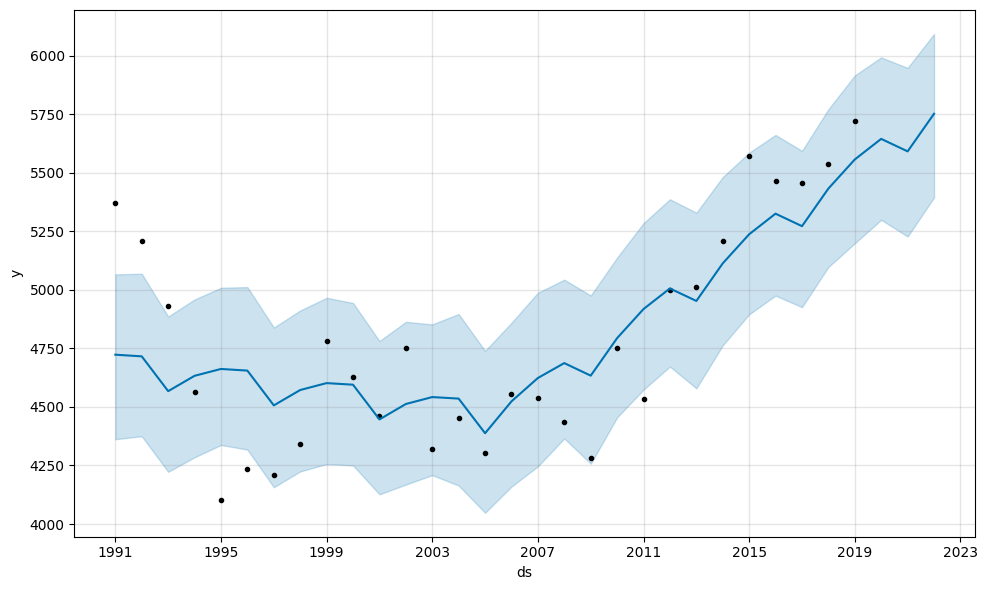

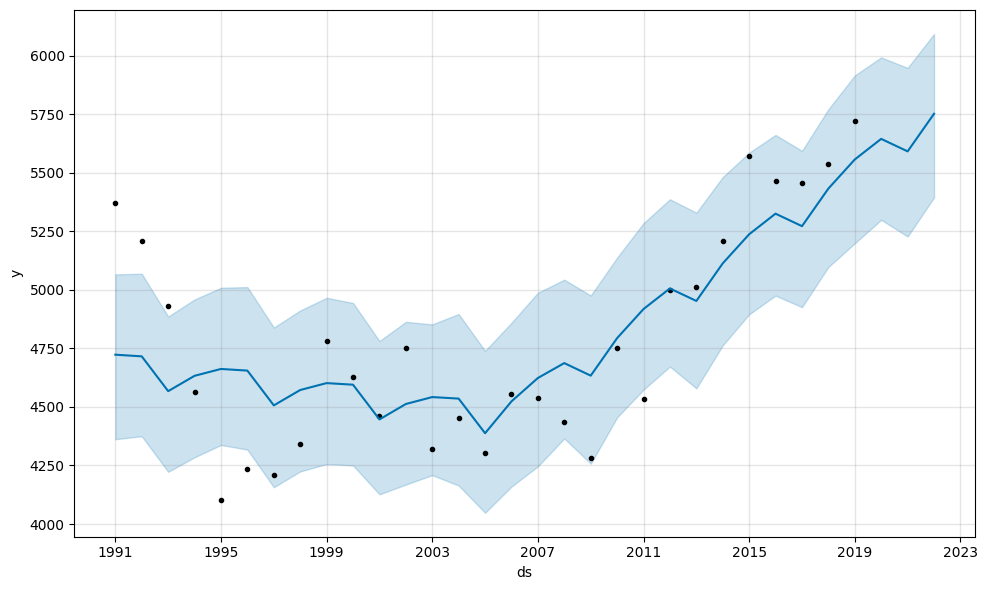

In [140]:
forecast = predict_model.predict(future)
predict_model.plot(forecast)

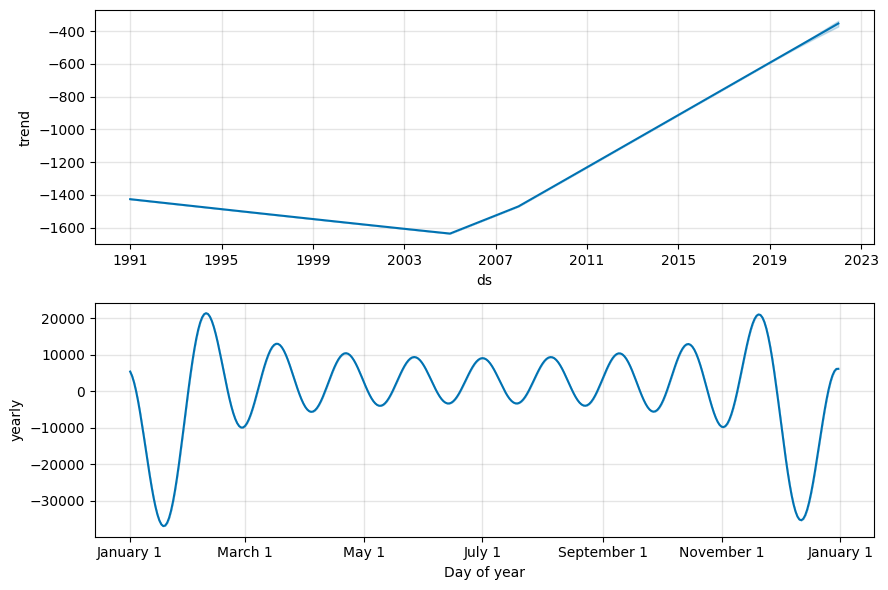

In [141]:
predict_model.plot_components(forecast);

In [142]:
print(", ".join(forecast.columns))

ds, trend, yhat_lower, yhat_upper, trend_lower, trend_upper, additive_terms, additive_terms_lower, additive_terms_upper, yearly, yearly_lower, yearly_upper, multiplicative_terms, multiplicative_terms_lower, multiplicative_terms_upper, yhat


In [143]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index("ds")[["yhat", "yhat_lower", "yhat_upper"]].join(historical.set_index("ds")
    )

In [144]:
cmp_df = make_comparison_dataframe(df, forecast)

In [145]:
def show_forecast(cmp_df, num_predictions, num_values, title, width=800, height=500):

    def create_go(name, column, num, **kwargs):
        points = cmp_df.tail(num)
        args = dict(name=name, x=points.index, y=points[column], mode="lines")
        args.update(kwargs)
        return go.Scatter(**args)

    lower_bound = create_go(
        "Lower Bound",
        "yhat_lower",
        num_predictions,
        line=dict(width=0),
        marker=dict(color="gray"),
    )
    upper_bound = create_go(
        "Upper Bound",
        "yhat_upper",
        num_predictions,
        line=dict(width=0),
        marker=dict(color="gray"),
        fillcolor="rgba(68, 68, 68, 0.3)",
        fill="tonexty",
    )
    forecast = create_go(
        "Forecast", "yhat", num_predictions, line=dict(color="rgb(31, 119, 180)")
    )
    actual = create_go("Actual", "y", num_values, marker=dict(color="red"))

    data = [lower_bound, upper_bound, forecast, actual]

    layout = go.Layout(yaxis=dict(title="Incidences"), title=title, showlegend=False)
    fig = go.Figure(data=data, layout=layout)
    iplot(fig, show_link=False)

show_forecast(cmp_df, prediction_size, 31, "Test model")

MAPE 1.371795156353853
MAE 74.23061978479352


In [121]:
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']
print('MAPE', np.mean(abs(cmp_df[-prediction_size:]['p'])))
print('MAE', np.mean(abs(cmp_df[-prediction_size:]['e'])))

MAPE 1.371795156353853
MAE 74.23061978479352
